In [202]:
# https://veeravignesh1.github.io/post/classification-with-iris-data/
# Inspired by above website: @author Tom Bohbot

import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np

import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset, DataLoader

In [203]:
# Load the dataset:
iris_l = datasets.load_iris()

In [204]:
# Add only 2 characteristics to the dataset, check target == 0 so that it is either a setosa or not a setosa. 
requiredData = {'petal length':iris_l.data[:, 2], 'sepal width': iris_l.data[:, 1], 'target':iris_l.target==0}
df = pd.DataFrame(data = requiredData)

In [206]:
# Split the data into 3 random groups so it can be better tested:
features = df.drop('target',axis=1).values
target = df.target.values
iris = TensorDataset(torch.FloatTensor(features),torch.LongTensor(target))
iris_loader = DataLoader(iris,batch_size=50,shuffle = True)

In [207]:
# Create a class to model each set of 50 data points:
class Model(nn.Module):
    
    def __init__(self,in_features=2,h1=6,h2=3,out_features=3):
        super().__init__()
        self.fc1 = nn.Linear(in_features,h1)
        self.fc2 = nn.Linear(h1,h2)
        self.out = nn.Linear(h2,out_features)
    
    def forward(self,x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)
        return x

In [208]:
mode1 = Model()

In [215]:
features = torch.FloatTensor(features)
target = torch.LongTensor(target)
X_train, X_test, y_train, y_test=train_test_split(features,target,random_state=59,test_size=0.2)

In [216]:
# Classification problem => Evaluated based on Cross Entropy Loss
criterion = nn.CrossEntropyLoss()

#Optimizer
optimizer = torch.optim.Adam(mode1.parameters(),lr=0.01)

#Epochs
epochs = 200
losses = []

for i in range(epochs):
    
    ypred = mode1.forward(X_train)
    
    loss = criterion(ypred,y_train)
    #Keeping track of loss
    losses.append(loss.item())

    if i%10==0:
        print(f'Epoch:{i},loss:{loss:.2f}')
        
    #Backpropagation
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch:0,loss:0.09
Epoch:10,loss:0.08
Epoch:20,loss:0.06
Epoch:30,loss:0.05
Epoch:40,loss:0.05
Epoch:50,loss:0.04
Epoch:60,loss:0.03
Epoch:70,loss:0.03
Epoch:80,loss:0.03
Epoch:90,loss:0.02
Epoch:100,loss:0.02
Epoch:110,loss:0.02
Epoch:120,loss:0.02
Epoch:130,loss:0.02
Epoch:140,loss:0.02
Epoch:150,loss:0.01
Epoch:160,loss:0.01
Epoch:170,loss:0.01
Epoch:180,loss:0.01
Epoch:190,loss:0.01


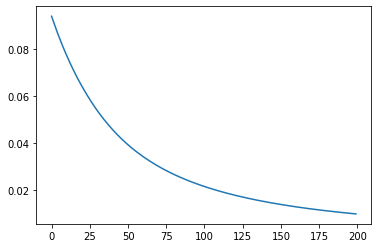

In [217]:
# Plot the data:
plt.plot(range(epochs),losses)
plt.show()

In [218]:
# Set up enviroment to predict unseen data:
with torch.no_grad():
    yval = mode1.forward(X_test)
    loss=criterion(yval,y_test)

In [219]:
# Test the unseen data, with results side by side:
correct =0
for i,data in enumerate(X_test):
    yval = mode1.forward(data)
    
    print(f"Predicted:{yval.argmax()} Actual:{y_test[i]}")
    if yval.argmax().item()== y_test[i]:
        correct+=1
    
print(f"We got {correct} Correct! out of {len(X_test)}")

Predicted:0 Actual:0
Predicted:1 Actual:1
Predicted:0 Actual:0
Predicted:0 Actual:0
Predicted:0 Actual:0
Predicted:0 Actual:0
Predicted:0 Actual:0
Predicted:1 Actual:1
Predicted:0 Actual:0
Predicted:0 Actual:0
Predicted:0 Actual:0
Predicted:0 Actual:0
Predicted:0 Actual:0
Predicted:1 Actual:1
Predicted:1 Actual:1
Predicted:1 Actual:1
Predicted:0 Actual:0
Predicted:0 Actual:0
Predicted:1 Actual:1
Predicted:0 Actual:0
Predicted:0 Actual:0
Predicted:0 Actual:0
Predicted:0 Actual:0
Predicted:0 Actual:0
Predicted:0 Actual:0
Predicted:0 Actual:0
Predicted:0 Actual:0
Predicted:1 Actual:1
Predicted:1 Actual:1
Predicted:1 Actual:1
We got 30 Correct! out of 30
